In [23]:

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

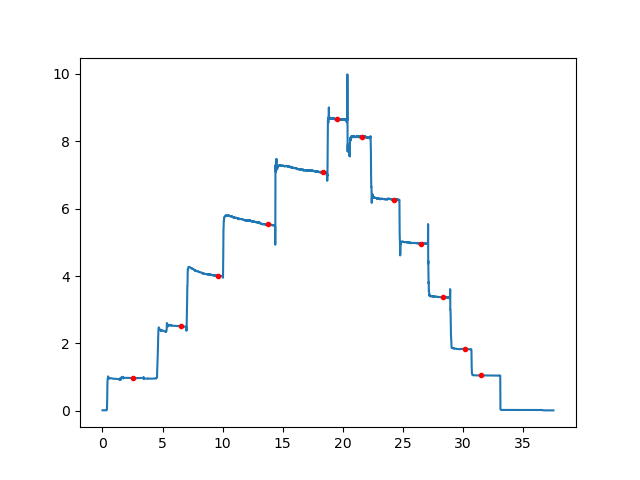

In [24]:
kal = pd.read_csv("/Users/lukas/Desktop/Studium/Chemie/Physikalische_Chemie/PC_Praktikum/QMS/Raw Data/quant_kal_75_33_8", sep="\s+", names=["t", "I"])

plt.Figure(figsize=(10, 5))
plt.plot(kal["t"], kal["I"])
#plt.plot(0.115367, 0.016354, "r.")
plt.plot(2.507050, 0.973434, "r.")
plt.plot(6.495483, 2.502576, "r.")
plt.plot(9.604400, 4.003168, "r.")
plt.plot(13.756100, 5.533254, "r.")
plt.plot(18.354117, 7.075326, "r.")
plt.plot(19.505167, 8.657402, "r.")
plt.plot(21.631917, 8.130123, "r.")
plt.plot(24.271350, 6.267679, "r.")
plt.plot(26.525750, 4.964353, "r.")
plt.plot(28.363700, 3.364531, "r.")
plt.plot(30.171817, 1.835330, "r.")
plt.plot(31.515917, 1.052058, "r.")
plt.show()
#plt.plot(35.198583, 0.025515, "r.")

array([4.66830387e-07])

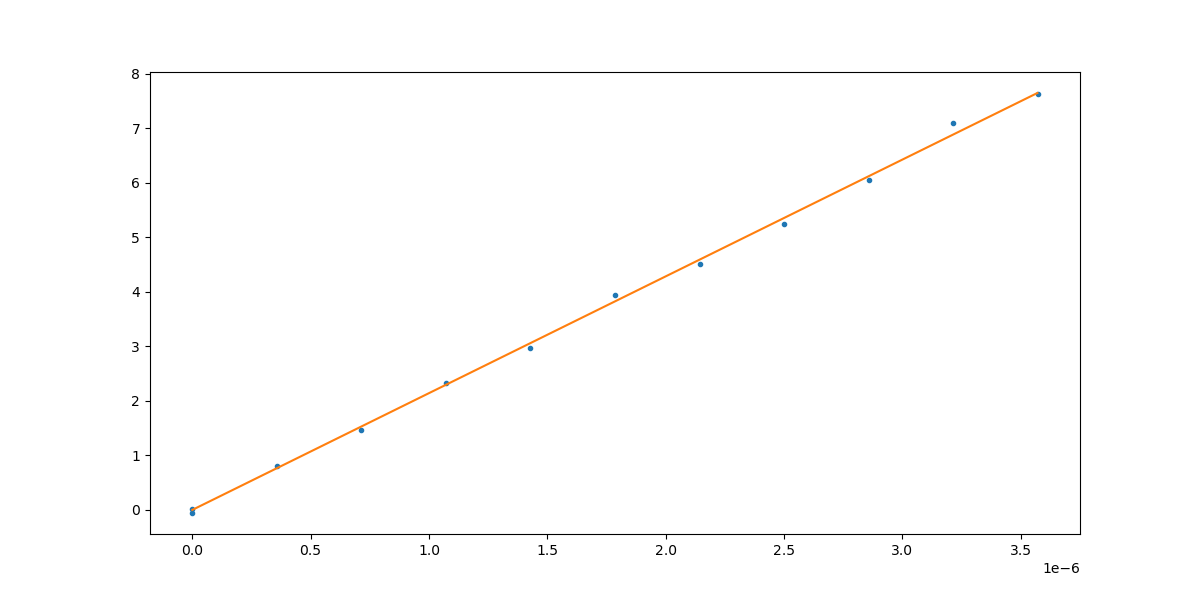

In [25]:
# Komische Art wie des da Klötzer so halb beschrieben hat 
p0 = 5e-6
p = [5e-6, 6e-6, 7e-6, 8e-6, 9e-6, 10e-6,  9.5e-6,  8.5e-6, 7.5e-6, 6.5e-6, 5.5e-6, 5e-6]
p = np.array(p, dtype=float)

i0 = 1.03
i = [0.973434, 2.502576, 4.003168, 5.533254, 7.075326, 8.657402, 8.130123, 6.267679, 4.964353, 3.364531, 1.835330, 1.052058]
i = np.array(i, dtype=float) 
IW = 1.4

delta_i = i - i0
delta_p = p - p0
delta_p = delta_p.reshape(-1, 1)
delta_p_real = delta_p/IW

reg = LinearRegression(fit_intercept=False).fit(delta_p_real, delta_i) 
r_squared = reg.score(delta_p_real, delta_i)
slope = reg.coef_
x = np.linspace(0, 3.57e-6, 1000)
y = x * slope


plt.figure(figsize=(12,6))
plt.plot(delta_p_real, delta_i, ".")
plt.plot(x,y)

i_probe = 1
p_probe = i_probe / slope
p_probe

Estimated p_sample: 4.6110951193236114e-07
Standard error in p_sample: 2.7495818961561276e-08


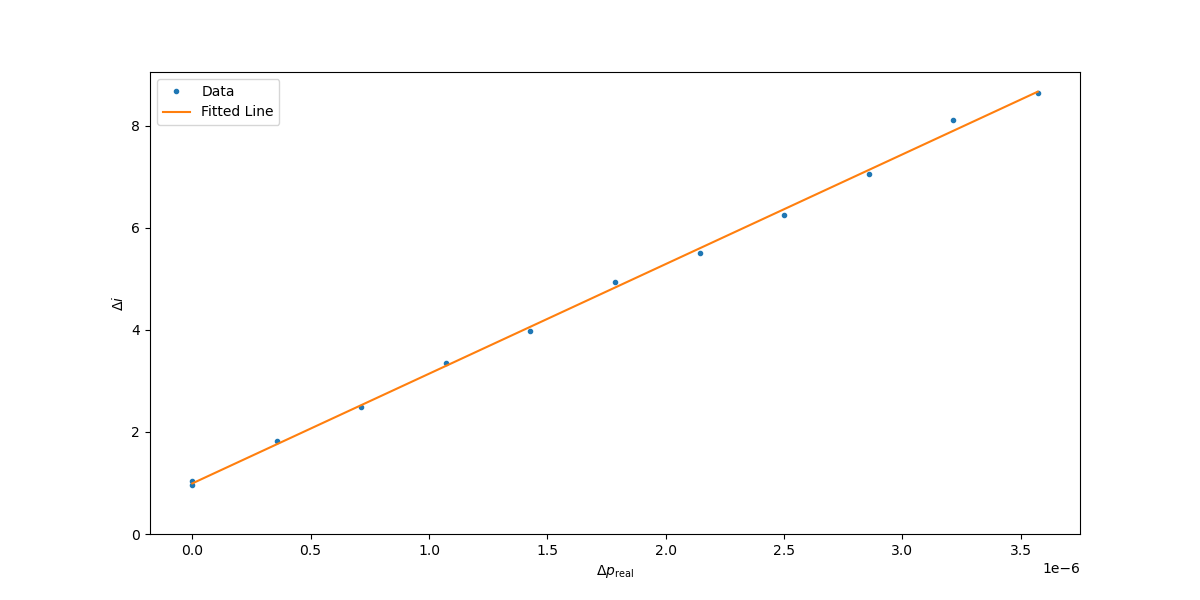

In [26]:
# Komisches ChatGPT Zeug zum ausrechnen vom Fehler 
p0 = 0
p  = np.array([0, 1e-6, 2e-6, 3e-6, 4e-6, 5e-6, 4.5e-6, 3.5e-6, 2.5e-6, 1.5e-6, 0.5e-6, 0])
i0 = 0.02
i = np.array([0.973434, 2.502576, 4.003168, 5.533254, 7.075326, 8.657402, 
              8.130123, 6.267679, 4.964353, 3.364531, 1.835330, 1.052058])
IW = 1.4

delta_i = i - i0
delta_p = p - p0
delta_p = delta_p.reshape(-1, 1)
delta_p_real = delta_p / IW  # this becomes our x variable

# Fit the linear model with statsmodels
X = sm.add_constant(delta_p_real)  # include intercept
model = sm.OLS(delta_i, X).fit()
intercept, slope = model.params

# Compute the standard error of the residuals (s_y)
n = len(delta_i)
s_y = np.sqrt(np.sum(model.resid**2) / (n - 2))

# Compute descriptive statistics for x (delta_p_real) and y (delta_i)
x = delta_p_real.flatten()  # flatten for simplicity
x_bar = np.mean(x)
S_xx = np.sum((x - x_bar)**2)
y_bar = np.mean(delta_i)

# Use the formula for s_x, which in our context gives the error in the predicted x (or p_sample)
s_x = s_y / abs(slope) * np.sqrt(1/n + (y_bar**2) / (slope**2 * S_xx))

# Calculate p_sample from the regression (absolute value of the x-intercept)
p_sample = abs(-intercept / slope)

print("Estimated p_sample:", p_sample)
print("Standard error in p_sample:", s_x)

# Optional: Plot the calibration curve
x_vals = np.linspace(x.min(), x.max(), 1000)
y_vals = slope * x_vals + intercept
plt.figure(figsize=(12, 6))
plt.plot(x, delta_i, ".", label="Data")
plt.plot(x_vals, y_vals, label="Fitted Line")
plt.xlabel(r'$\Delta p_{\text{real}}$')
plt.ylabel(r'$\Delta i$')
plt.legend()
plt.ylim(0)
plt.show()

[11.27458095]
[88.72541905]


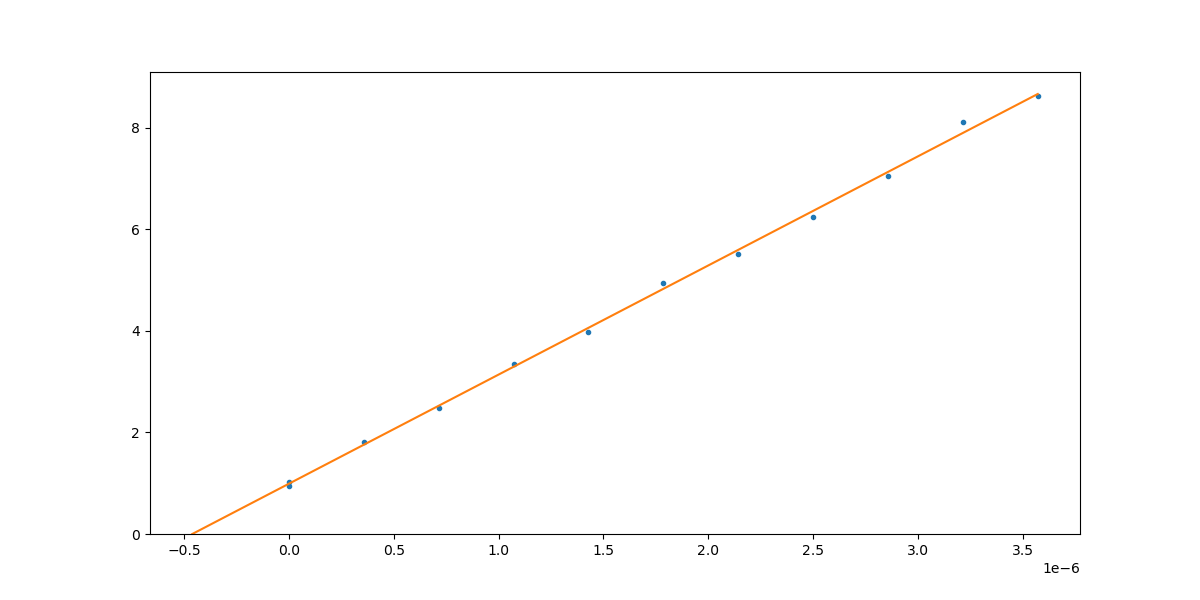

In [ ]:
# So wie des für mi am meisten Sinn gmacht hat, wie a normale Standardaddition gerechnet 
p0 = 0
#p = [5e-6, 6e-6, 7e-6, 8e-6, 9e-6, 10e-6,  9.5e-6,  8.5e-6, 7.5e-6, 6.5e-6, 5.5e-6, 5e-6]
p  = [0, 1e-6, 2e-6, 3e-6, 4e-6, 5e-6, 4.5e-6, 3.5e-6, 2.5e-6, 1.5e-6, 0.5e-6, 0]
p = np.array(p, dtype=float)


i0 = 0.02
i = [0.973434, 2.502576, 4.003168, 5.533254, 7.075326, 8.657402, 8.130123, 6.267679, 4.964353, 3.364531, 1.835330, 1.052058]
i = np.array(i, dtype=float) 
IW = 1.4

delta_i = i - i0
delta_p = p - p0
delta_p = delta_p.reshape(-1, 1)
delta_p_real = delta_p/IW

reg = LinearRegression(fit_intercept=True).fit(delta_p_real, delta_i) 
r_squared = reg.score(delta_p_real, delta_i)
slope = reg.coef_
x = np.linspace(- reg.intercept_ / reg.coef_, np.max(delta_p_real), 1000)
y = x * slope + reg.intercept_


plt.figure(figsize=(12,6))
plt.plot(delta_p_real, delta_i, ".")
plt.plot(x,y)
plt.ylim(0)

p_sample = np.abs(- reg.intercept_ / reg.coef_)
# Mir haben da Argon und Helium in da Probe oder? Dann müsst ma mit 2 Gasen kalibibrieren, was mir net gmacht haben
# Deswegen die Annahme das nur CO2 und Argon drin is, also delta_sample = IW_CO2*p_sample + IW_Ar * p_argon


# p_probe_real = p_sample 

# p_sample = p_comp CO2 * IW_CO2 + IW_Ar * p_argon 



IW_argon = 1.2

p_argon = (5e-6 - p_sample * IW) / IW_argon


p_sample / p_argon  *100



p_probe_real = p_sample + p_argon 

print(p_sample/p_probe_real * 100) # CO2
print(p_argon/p_probe_real * 100) # Argon